In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"pd_speech_features.csv")

df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
df.shape

(756, 755)

In [5]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [6]:
scaler = StandardScaler()

In [7]:
X = df.drop('class',axis=1).values
y = df['class'].values

X_Scale = scaler.fit_transform(X)

In [8]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,class
0,-10.047372,1.471070,1
1,-10.637725,1.583741,1
2,-13.516185,-1.253537,1
3,-9.155083,8.833583,1
4,-6.764470,4.611468,1


Text(0, 0.5, 'pc2')

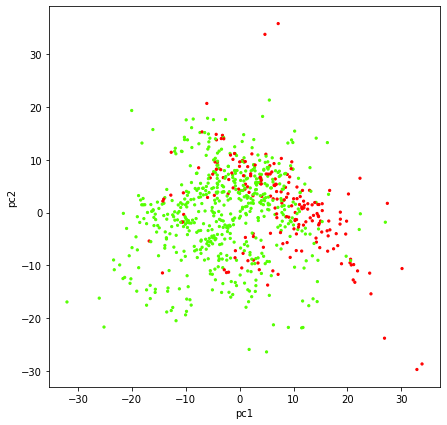

In [9]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=finalDf['class'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')

In [10]:
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,class
0,-10.047372,1.471077,-6.846399,1
1,-10.637725,1.583750,-6.830975,1
2,-13.516185,-1.253542,-6.818694,1
3,-9.155085,8.833597,15.290899,1
4,-6.764471,4.611462,15.637111,1


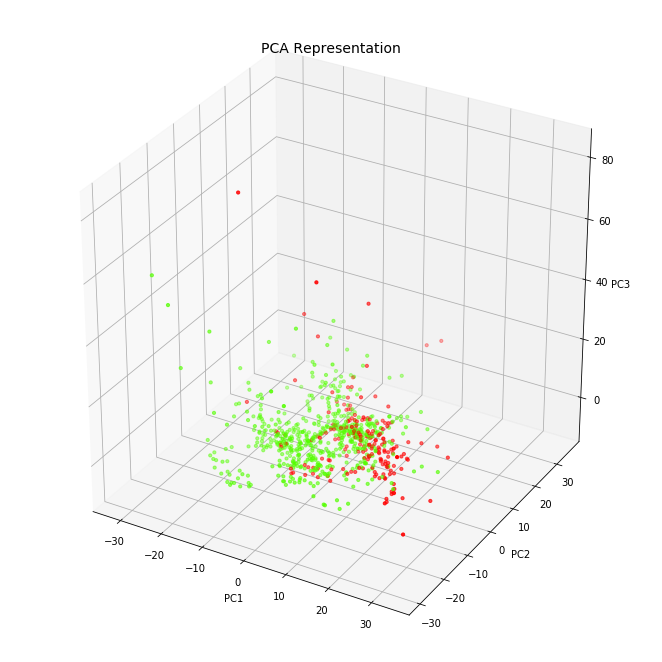

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

axes.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c=finalDf['class'], cmap = 'prism', s=10)

In [12]:
X = df.drop('class',axis=1).values
y = df['class'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [18]:
%%time

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)

y_train_hat =logisticRegr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('"Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

"Accuracy for our Training dataset with PCA is: 75.9924 %
Wall time: 64.8 ms


In [19]:
%%time

y_test_hat=logisticRegr.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our Testing dataset with tuning is : {:.3f}%".format(test_accuracy) )

Accuracy for our Testing dataset with tuning is : 76.652%
Wall time: 1.02 ms


In [20]:
scaler = StandardScaler()

In [21]:
# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
%%time

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_scaled,y_train)

y_train_hat =logisticRegr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('"Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

"Accuracy for our Training dataset with PCA is: 100.0000 %
Wall time: 58.5 ms


In [23]:
%%time

y_test_hat=logisticRegr.predict(X_test_scaled)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our Testing dataset with PCA is : {:.3f}%".format(test_accuracy) )

Accuracy for our Testing dataset with PCA is : 84.141%
Wall time: 1.55 ms
